In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
muon_veto = np.genfromtxt("./histograms_csv/histo_veto_longrun.txt")
calibration_20us = np.genfromtxt("./histograms_csv/histo_time_cal.txt")

2046
827 9.0
828 21.0
829 15.0
830 12.0
831 6.0
1652 12.0
1653 28.0


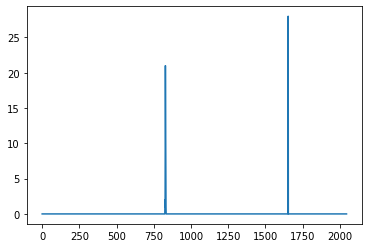

In [52]:
print(len(calibration_20us))
def bintous():
    for i, count in enumerate(calibration_20us):
        if count > 2:
            print(i,count)
bintous()

x = np.arange(len(calibration_20us))
plt.plot(x, calibration_20us)

In [15]:
def rebin(x, y, nbins=1000):
    total_bins = len(x)
    per_bucket = int(total_bins/nbins)
    xchunks = list(zip(*[iter(x)]*per_bucket))
    ychunks = list(zip(*[iter(y)]*per_bucket))
    
    chunks = list(zip(xchunks, ychunks))
    
    x = []
    y = []
    
    for chunk in chunks:
        x.append(np.mean(chunk[0]))
        y.append(sum(chunk[1]))
    return np.array(x), np.array(y)


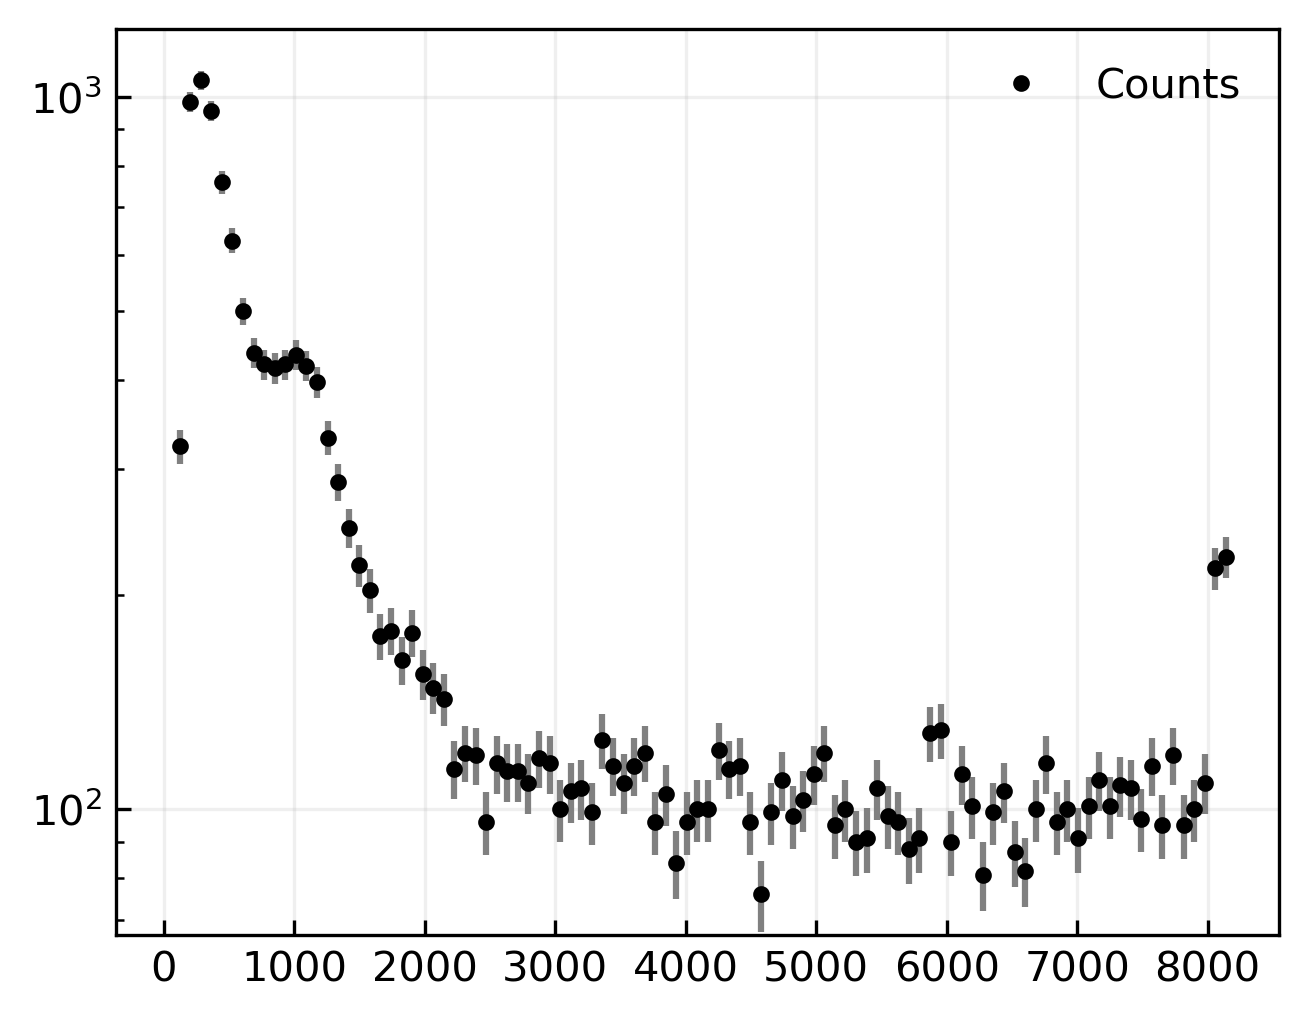

In [42]:
nbins = range(len(muon_veto))
x, y = rebin(nbins, muon_veto, 100)
yerr = np.sqrt(y)

fig, ax = plt.subplots(figsize=(5,4), dpi=300)
ax.plot(x,y, linestyle="None", marker=".", color = "black")
ax.errorbar(x,y, yerr=yerr, linestyle="None", color = "grey")
ax.set_yscale("log")
ax.set(ylabel="Counts made", xlabel="")

ax.tick_params(direction="in", which="both")
ax.grid(alpha=0.2)
ax.legend(frameon=False)